# Prediction of house price using Machine learning

In this project we are going to predict the price of house so this kind of problem is called as Regression  problem.

## Problem definition

>* How well can we predict price of house by using given data

## Data

>* train.csv - the training set
>* test.csv - the test set
>* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
>* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
>* for brif info visit-https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Evaluation
>* for this problem we will set evaluation metrix to RMSE(Root mean squared error)between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Features
>* for feature info we have given a txt file which contains all features info 
>* or you can visit-https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Required Modules

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# to see plot in notebook 
%matplotlib inline



In [7]:
# To view all columns of data set
pd.set_option("display.max_columns",None)

In [3]:
## Data reading

train_df = pd.read_csv(r"C:\Users\SAGAR KESHAVE\Git_ML_Proj\Machine Learning Projects\Regression\House_price_prediction\Data\train (1).csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Lets explore Data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
len(train_df)

1460

In [6]:
train_df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [7]:
sum = 0
for i in range(0, 1461):
    sum = sum + i
    
print(sum)


1066530


In [8]:
1066530/1460

730.5

<AxesSubplot:>

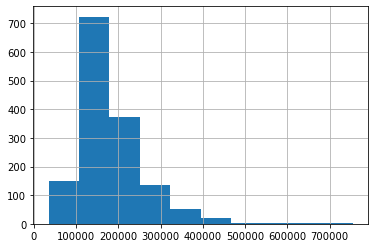

In [9]:
train_df.SalePrice.hist()

# Prices lies bet 1lakh USD to 2.5lakh USD

In [10]:
train_df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [11]:
train_df.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [12]:
# All year features

year_feature = [ feature for  feature in train_df.columns if "Yr" in feature or "Year" in feature ]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

(<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>,)

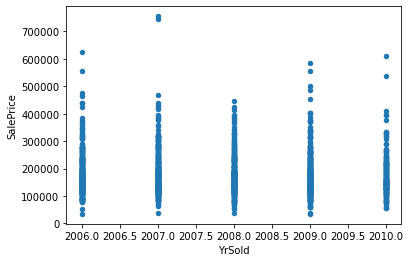

In [13]:
train_df.plot.scatter(x = "YrSold", y="SalePrice") , #plt.scatter(x = train_df.YrSold, y = train_df.SalePrice)

In [14]:
# lets check numeric features

In [15]:
numeric_features = [ feature for feature, content in train_df.items() if [content] != "O" ]
numeric_features


# numeric_features=[]
# for lable, content in train_df.items():
#     if pd.api.types.is_numeric_dtype(content):
#      numeric_features.append(lable)
    
# numeric_features    

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [16]:
numeric_visual = [feature for feature in numeric_features if len(train_df[feature].unique())<25 and feature not in year_feature ]

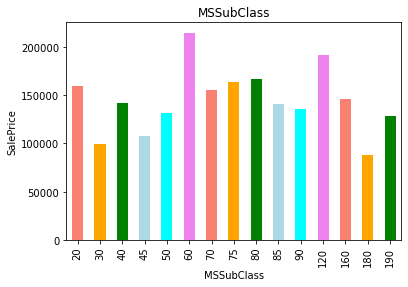

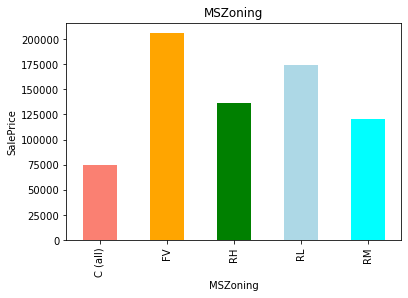

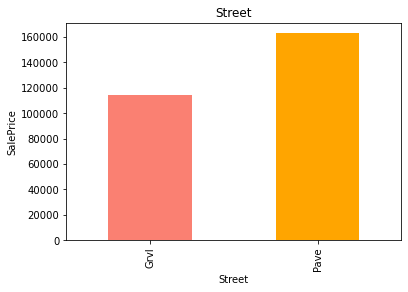

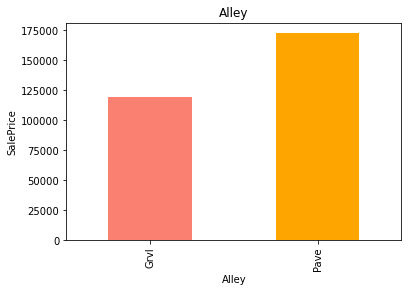

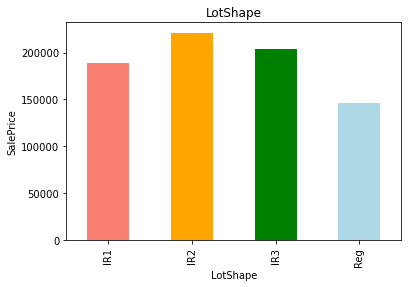

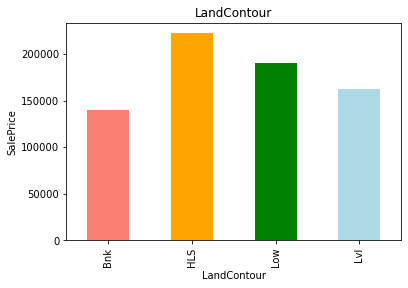

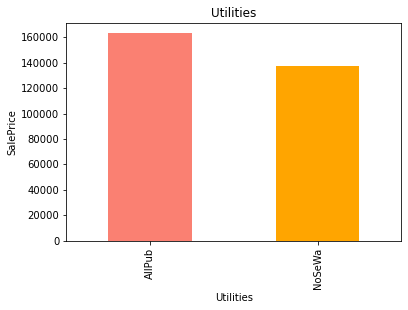

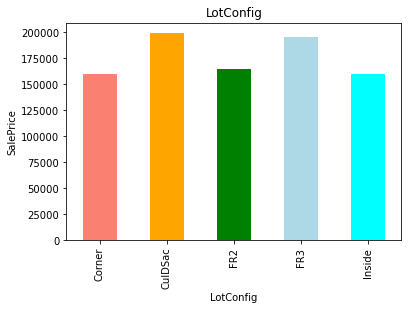

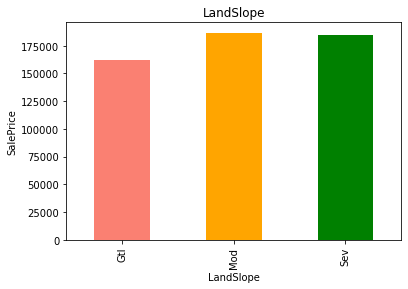

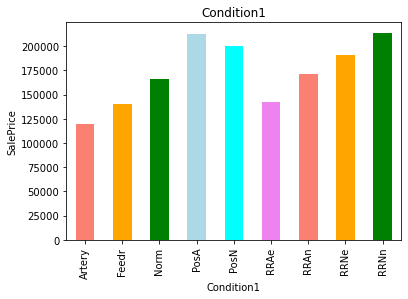

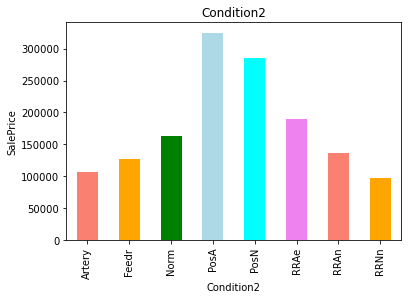

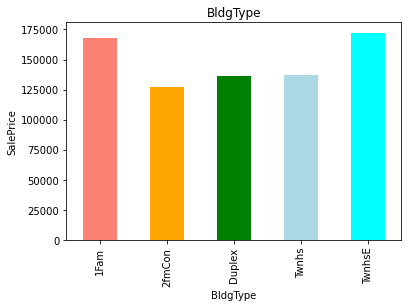

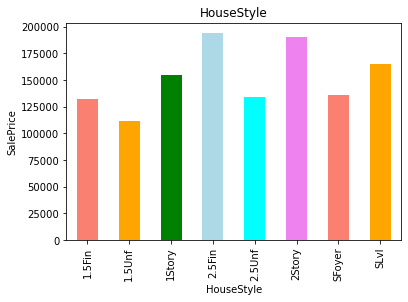

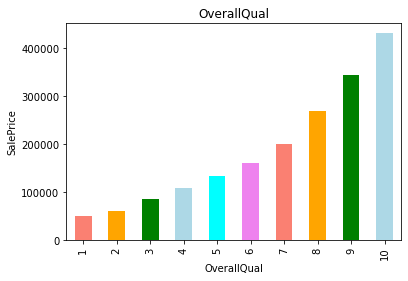

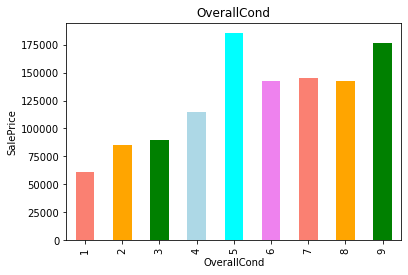

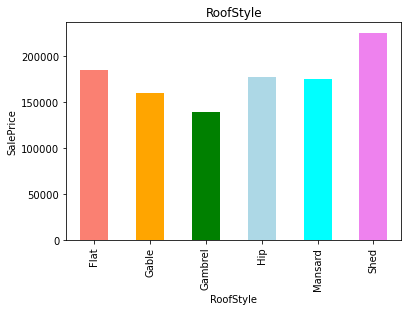

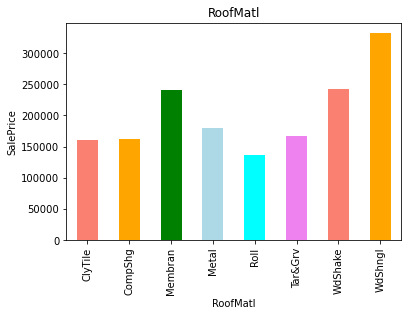

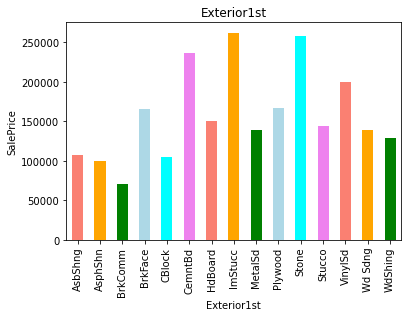

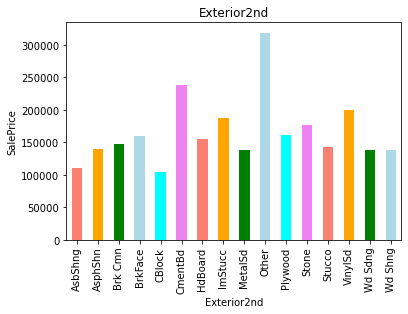

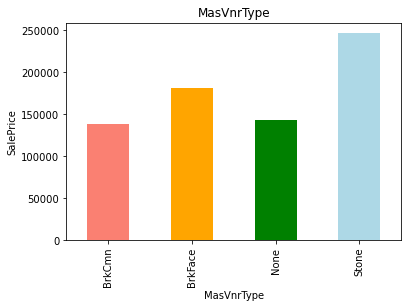

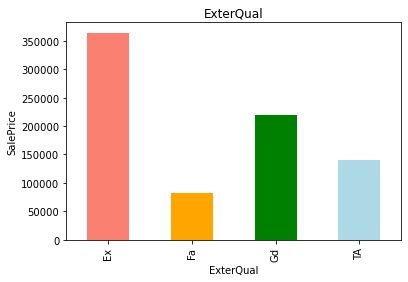

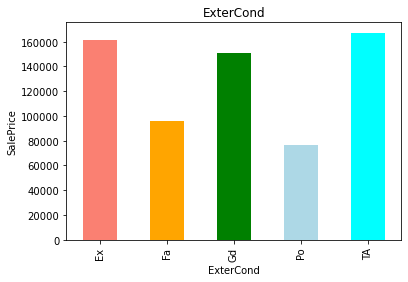

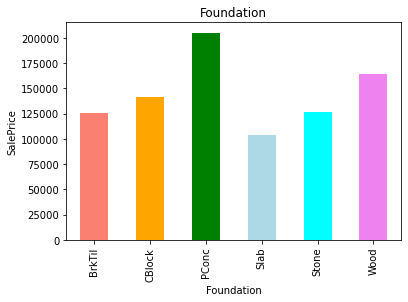

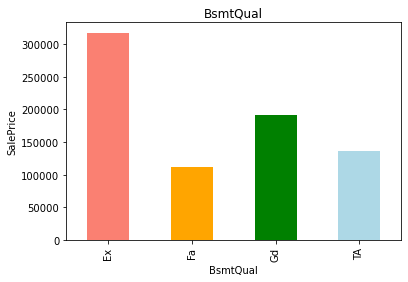

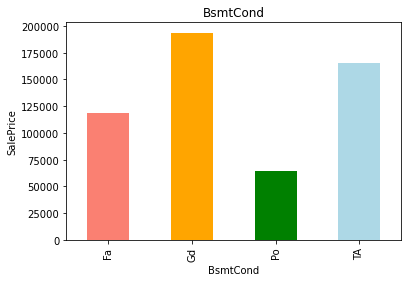

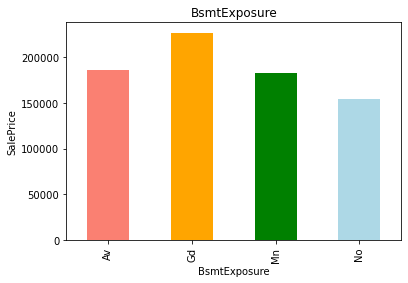

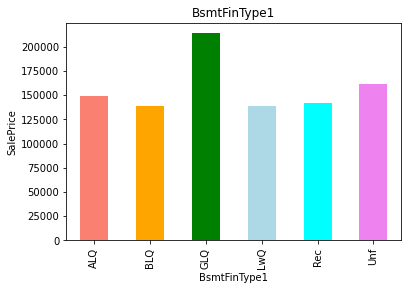

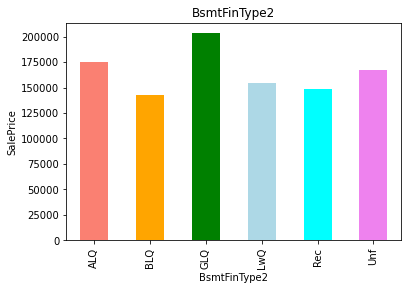

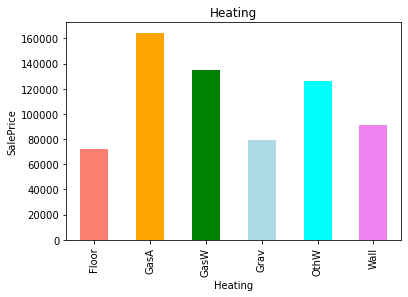

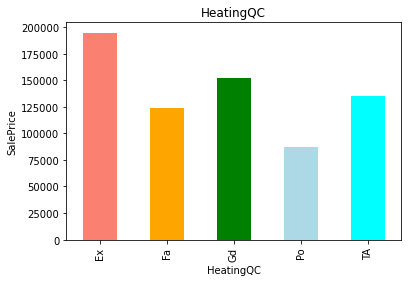

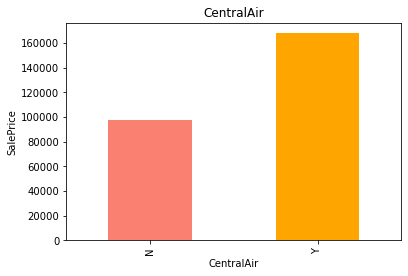

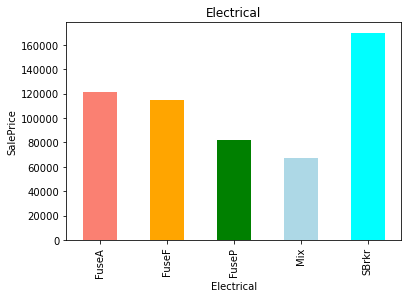

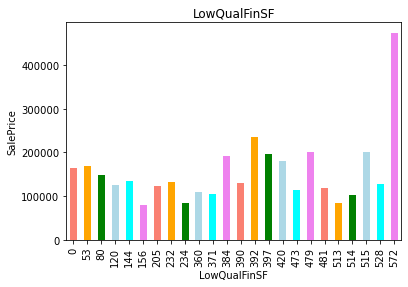

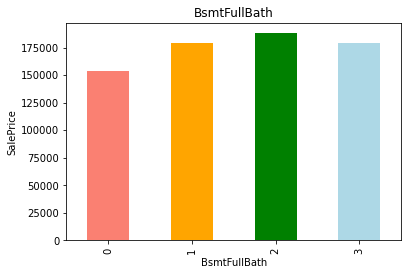

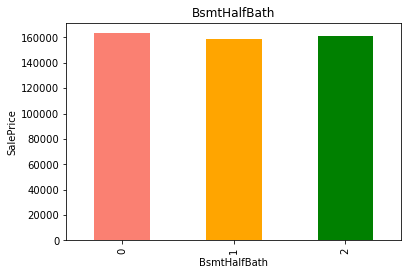

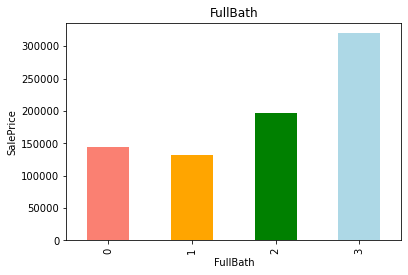

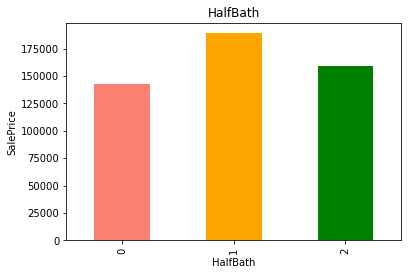

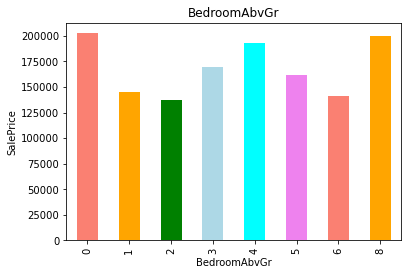

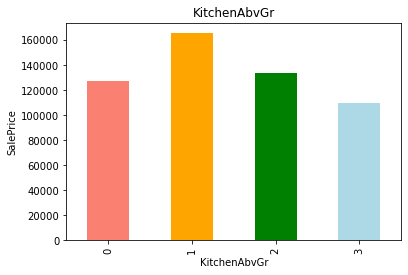

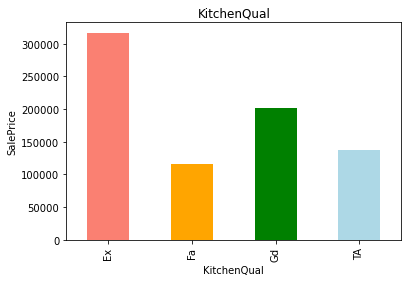

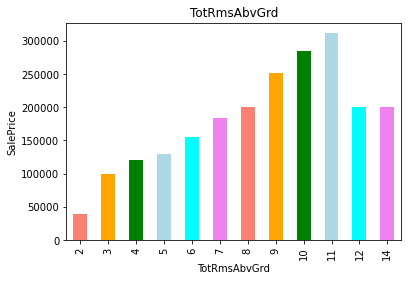

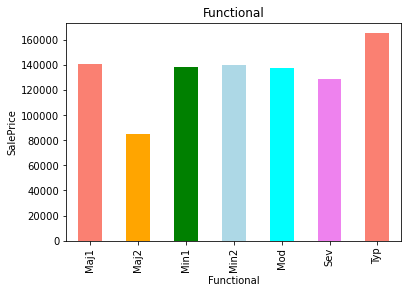

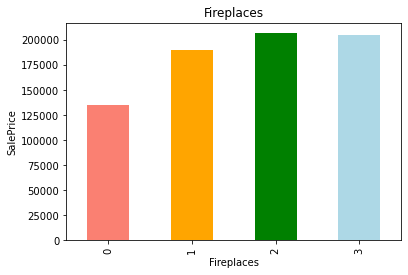

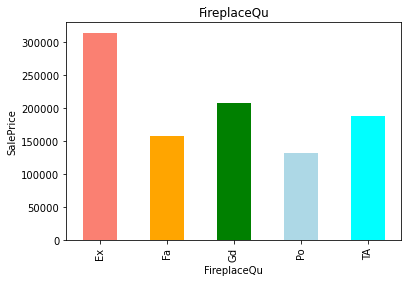

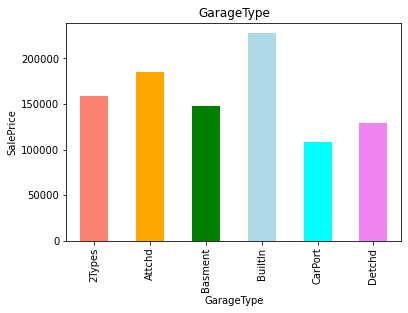

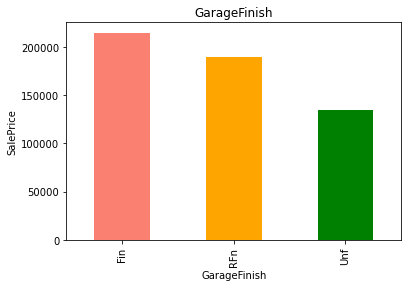

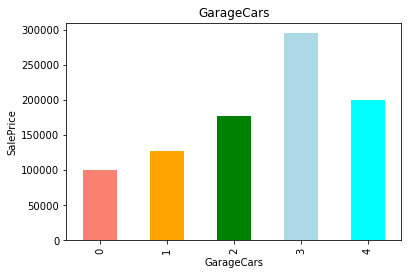

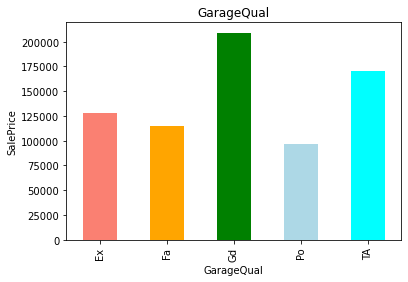

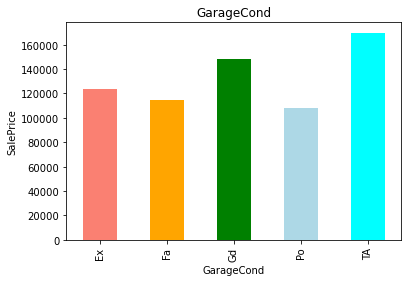

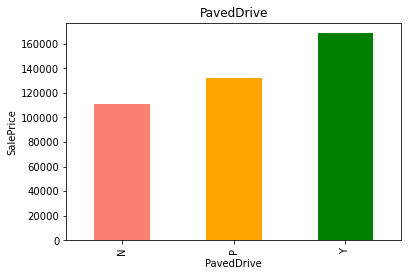

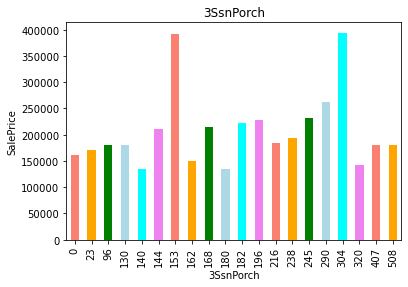

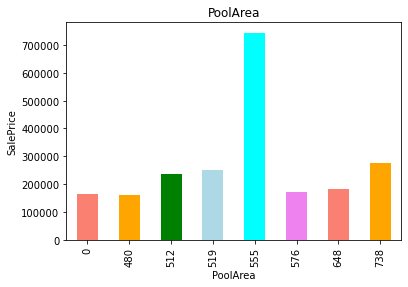

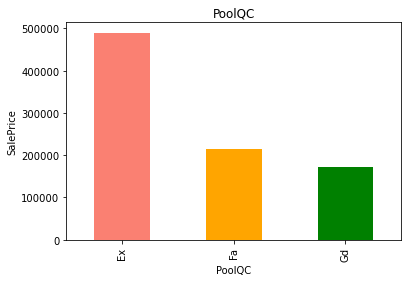

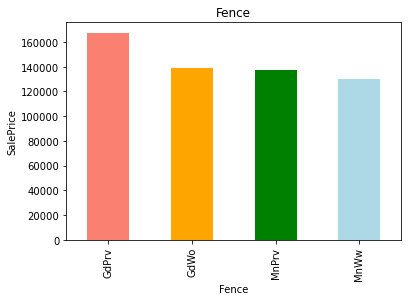

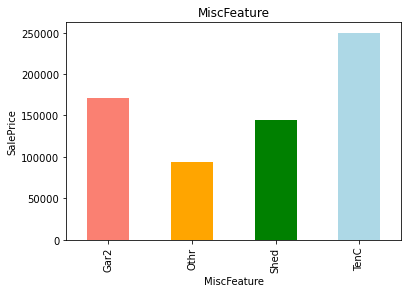

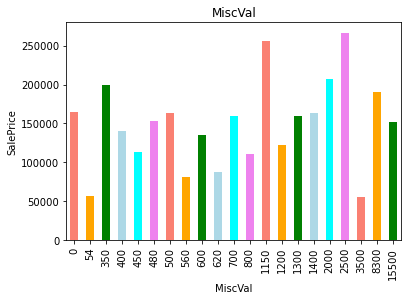

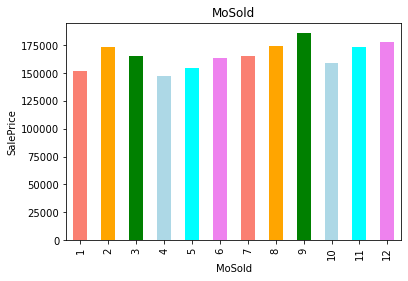

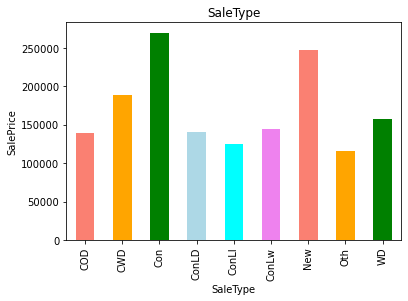

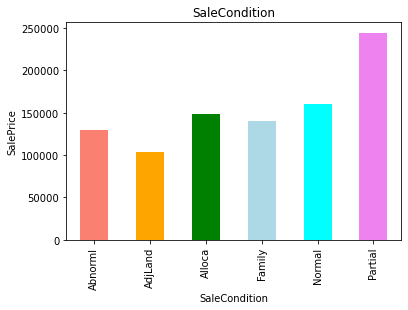

In [17]:
for feature in numeric_visual:
    tmp_data = train_df.copy()
    tmp_data.groupby(feature)['SalePrice'].median().plot.bar(color=['salmon', 'orange', 'green', 'lightblue', 'cyan', 'violet'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [18]:
continuous_features = [features for features in numeric_features if features not in numeric_visual+year_feature+['Id']]
continuous_features

['LotFrontage',
 'LotArea',
 'Neighborhood',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

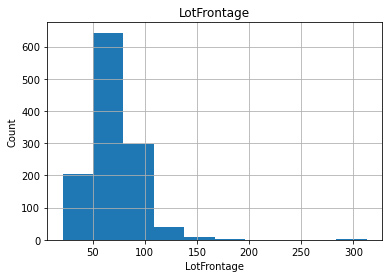

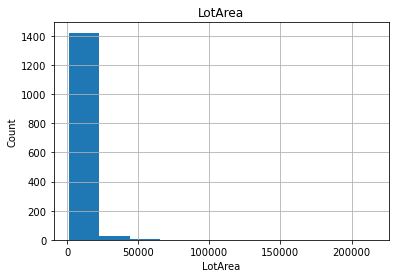

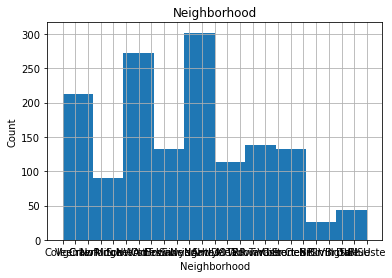

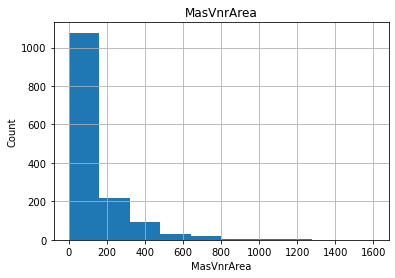

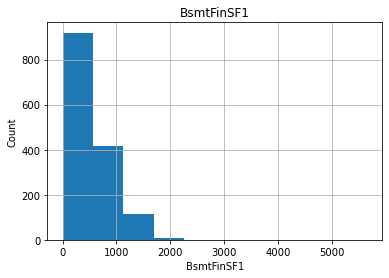

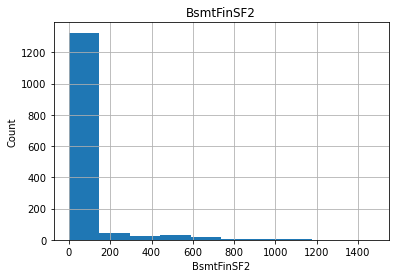

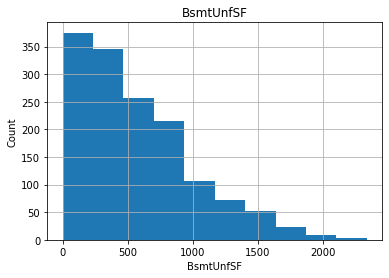

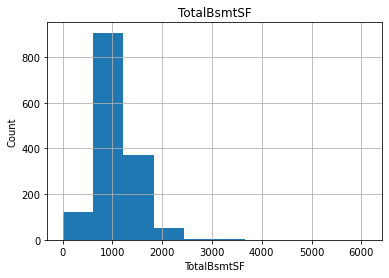

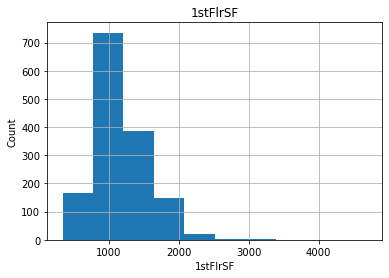

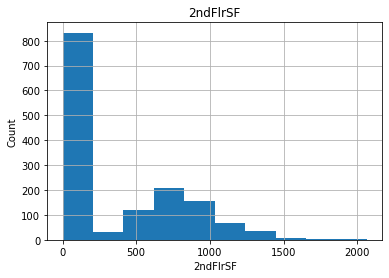

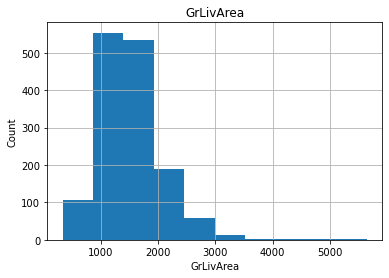

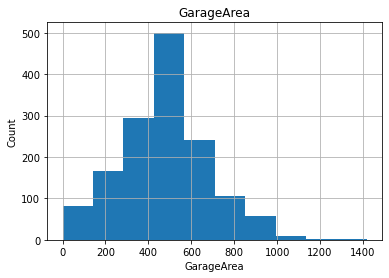

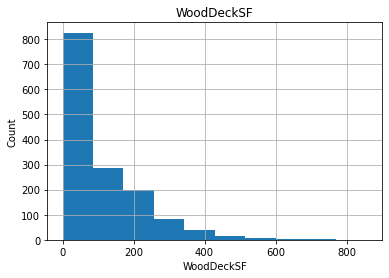

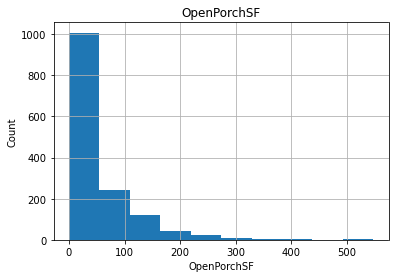

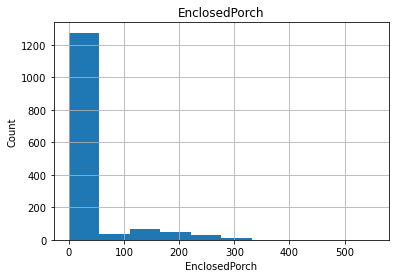

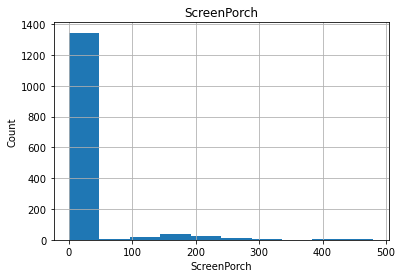

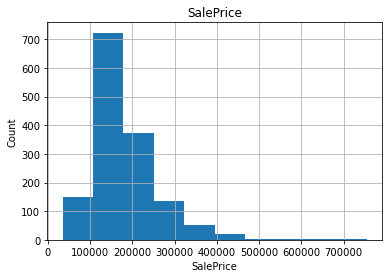

In [19]:
for feature in continuous_features:
    tmp1_data = train_df.copy()
    tmp1_data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical features

In [20]:
categorical_features = [feature for feature , content in train_df.items()  if content.dtype == "object"]
categorical_features



# categorical_features = []
# for lable, content in train_df.items():
#     if not pd.api.types.is_numeric_dtype(content):
#         categorical_features.append(lable)
        
# categorical_features    

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Feature Engineering

In [21]:
for feature in train_df.columns:
    if train_df[feature].isnull().sum()/len(train_df)>0.0:
        print(f'\n{feature} is missing {train_df[feature].isnull().sum()/len(train_df)*100} % of data' )


LotFrontage is missing 17.73972602739726 % of data

Alley is missing 93.76712328767123 % of data

MasVnrType is missing 0.547945205479452 % of data

MasVnrArea is missing 0.547945205479452 % of data

BsmtQual is missing 2.5342465753424657 % of data

BsmtCond is missing 2.5342465753424657 % of data

BsmtExposure is missing 2.6027397260273974 % of data

BsmtFinType1 is missing 2.5342465753424657 % of data

BsmtFinType2 is missing 2.6027397260273974 % of data

Electrical is missing 0.0684931506849315 % of data

FireplaceQu is missing 47.26027397260274 % of data

GarageType is missing 5.5479452054794525 % of data

GarageYrBlt is missing 5.5479452054794525 % of data

GarageFinish is missing 5.5479452054794525 % of data

GarageQual is missing 5.5479452054794525 % of data

GarageCond is missing 5.5479452054794525 % of data

PoolQC is missing 99.52054794520548 % of data

Fence is missing 80.75342465753424 % of data

MiscFeature is missing 96.30136986301369 % of data


#### **NOTE**- here some columns missing more than 90% of data we will drop them
>* PoolQC
>* MiscFeature
>* Alley

In [22]:
for feature in train_df.columns:
   print(f'{feature} is having {len(train_df[feature].unique())} unique values')


Id is having 1460 unique values
MSSubClass is having 15 unique values
MSZoning is having 5 unique values
LotFrontage is having 111 unique values
LotArea is having 1073 unique values
Street is having 2 unique values
Alley is having 3 unique values
LotShape is having 4 unique values
LandContour is having 4 unique values
Utilities is having 2 unique values
LotConfig is having 5 unique values
LandSlope is having 3 unique values
Neighborhood is having 25 unique values
Condition1 is having 9 unique values
Condition2 is having 8 unique values
BldgType is having 5 unique values
HouseStyle is having 8 unique values
OverallQual is having 10 unique values
OverallCond is having 9 unique values
YearBuilt is having 112 unique values
YearRemodAdd is having 61 unique values
RoofStyle is having 6 unique values
RoofMatl is having 8 unique values
Exterior1st is having 15 unique values
Exterior2nd is having 16 unique values
MasVnrType is having 5 unique values
MasVnrArea is having 328 unique values
ExterQ

In [23]:
train_df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


## Missing values

In [24]:
train_df.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 78, dtype: int64

#### **NOTE**-Numeric_columns are not missing much values so will just fill with median 

In [25]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [26]:
# Numeric columns have null values
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [27]:
# Fill numeric rows with the median
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            
            # Filling missing numeric values with median
            train_df[label] = content.fillna(content.median())

In [28]:
train_df.shape

(1460, 78)

In [29]:
# No numeric columns have empty values filled with median

In [30]:
# Dealing with categorical columns

In [31]:
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(f'{label} = {content.dtype}')

MSZoning = object
Street = object
LotShape = object
LandContour = object
Utilities = object
LotConfig = object
LandSlope = object
Neighborhood = object
Condition1 = object
Condition2 = object
BldgType = object
HouseStyle = object
RoofStyle = object
RoofMatl = object
Exterior1st = object
Exterior2nd = object
MasVnrType = object
ExterQual = object
ExterCond = object
Foundation = object
BsmtQual = object
BsmtCond = object
BsmtExposure = object
BsmtFinType1 = object
BsmtFinType2 = object
Heating = object
HeatingQC = object
CentralAir = object
Electrical = object
KitchenQual = object
Functional = object
FireplaceQu = object
GarageType = object
GarageFinish = object
GarageQual = object
GarageCond = object
PavedDrive = object
Fence = object
SaleType = object
SaleCondition = object


####  Way to convert non numeric data into numbers is to convert it into pandas category 

In [32]:
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
       train_df[label] = content.astype("category")

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

#### to check the codes of category use following
* NOTE *- pandas category fills NaN with -1 

In [37]:
train_df.GarageType.cat.codes

0       1
1       1
2       1
3       5
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Length: 1460, dtype: int8

In [39]:
for feature in train_df.columns:
    if train_df[feature].isnull().sum()/len(train_df)>0.0:
        print(f'\n{feature} is missing {train_df[feature].isnull().sum()/len(train_df)*100} % of data' )


MasVnrType is missing 0.547945205479452 % of data

BsmtQual is missing 2.5342465753424657 % of data

BsmtCond is missing 2.5342465753424657 % of data

BsmtExposure is missing 2.6027397260273974 % of data

BsmtFinType1 is missing 2.5342465753424657 % of data

BsmtFinType2 is missing 2.6027397260273974 % of data

Electrical is missing 0.0684931506849315 % of data

FireplaceQu is missing 47.26027397260274 % of data

GarageType is missing 5.5479452054794525 % of data

GarageFinish is missing 5.5479452054794525 % of data

GarageQual is missing 5.5479452054794525 % of data

GarageCond is missing 5.5479452054794525 % of data

Fence is missing 80.75342465753424 % of data


### convert category ie. non integer to integer

In [41]:
for label, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_df[label] = pd.Categorical(content).codes+1

In [47]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,0,12,2008,9,5,250000


In [48]:
for feature in train_df.columns:
    if train_df[feature].isnull().sum()/len(train_df)>0.0:
        print(f'{feature} is missing {train_df[feature].isnull().sum()/len(train_df)*100} % of data' )

In [49]:
# No null values present in dataset 

In [51]:
train_df.isnull().sum()  # Same way

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

### Feature selection
>* Usually we do feature selection after splitting data into train and test but here we are doing this before beause we have diffrent test set

In [52]:
train_df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.009921,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.041925,-0.051071,0.001689,0.029826,0.008514,0.047012,0.008128,-0.021390,0.015973,-0.005024,0.038448,-0.005968,-0.007940,-0.015415,0.042120,0.002157,0.009821,0.032392,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,-0.004432,0.027239,-0.001064,-0.019772,-0.001108,0.003453,-0.000122,0.000034,0.016570,0.017634,0.010732,0.005117,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.013202,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.356718,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,-0.022693,0.023573,-0.017161,-0.003254,0.058126,-0.045282,-0.021027,-0.066625,0.008407,-0.069836,0.020935,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.049829,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,-0.010293,0.063761,0.081396,-0.052038,-0.040110,-0.098672,-0.073844,-0.078145,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.108141,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.105961,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,0.004480,-0.062830,0.200536,-0.096041,-0.235174,0.102637,-0.017244,0.027356,0.017286,-0.049128,-0.032210,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070196,-0.055614,-0.051481,0.011520,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.020596,0.093439,-0.263772,0.101357,-0.157042,-0.189250,-0.125427,-0.090149,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.066785,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.009921,-0.356718,-0.105961,1.000000,0.304522,-0.037349,-0.138877,-0.076080,-0.001027,-0.177821,0.065603,0.084901,-0.009341,0.002599,-0.408013,0.030567,0.234812,-0.053281,0.116685,0.083348,0.153999,0.081277,0.075455,0.099515,-0.020130,0.178469,-0.184120,0.048300,0.098418,-0.129411,0.056944,-0.098483,-0.008766,0.214367,-0.000567,0.042463,0.124098,0.363472,-0.020325,-0.081081,0.067350,0.058712,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,-0.190232,0.320518,0.030114,0.233221,0.181412,-0.178181,0.062996,-0.112841,0.269539,0.323511,0.110532,0.106817,0.088121,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,0.019469,-0.000255,0.010451,0.006380,-0.031412,0.058857,0.334771
LotArea,-0.033226,-0.139781,-0.034452,0.304522,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.105806,-0.

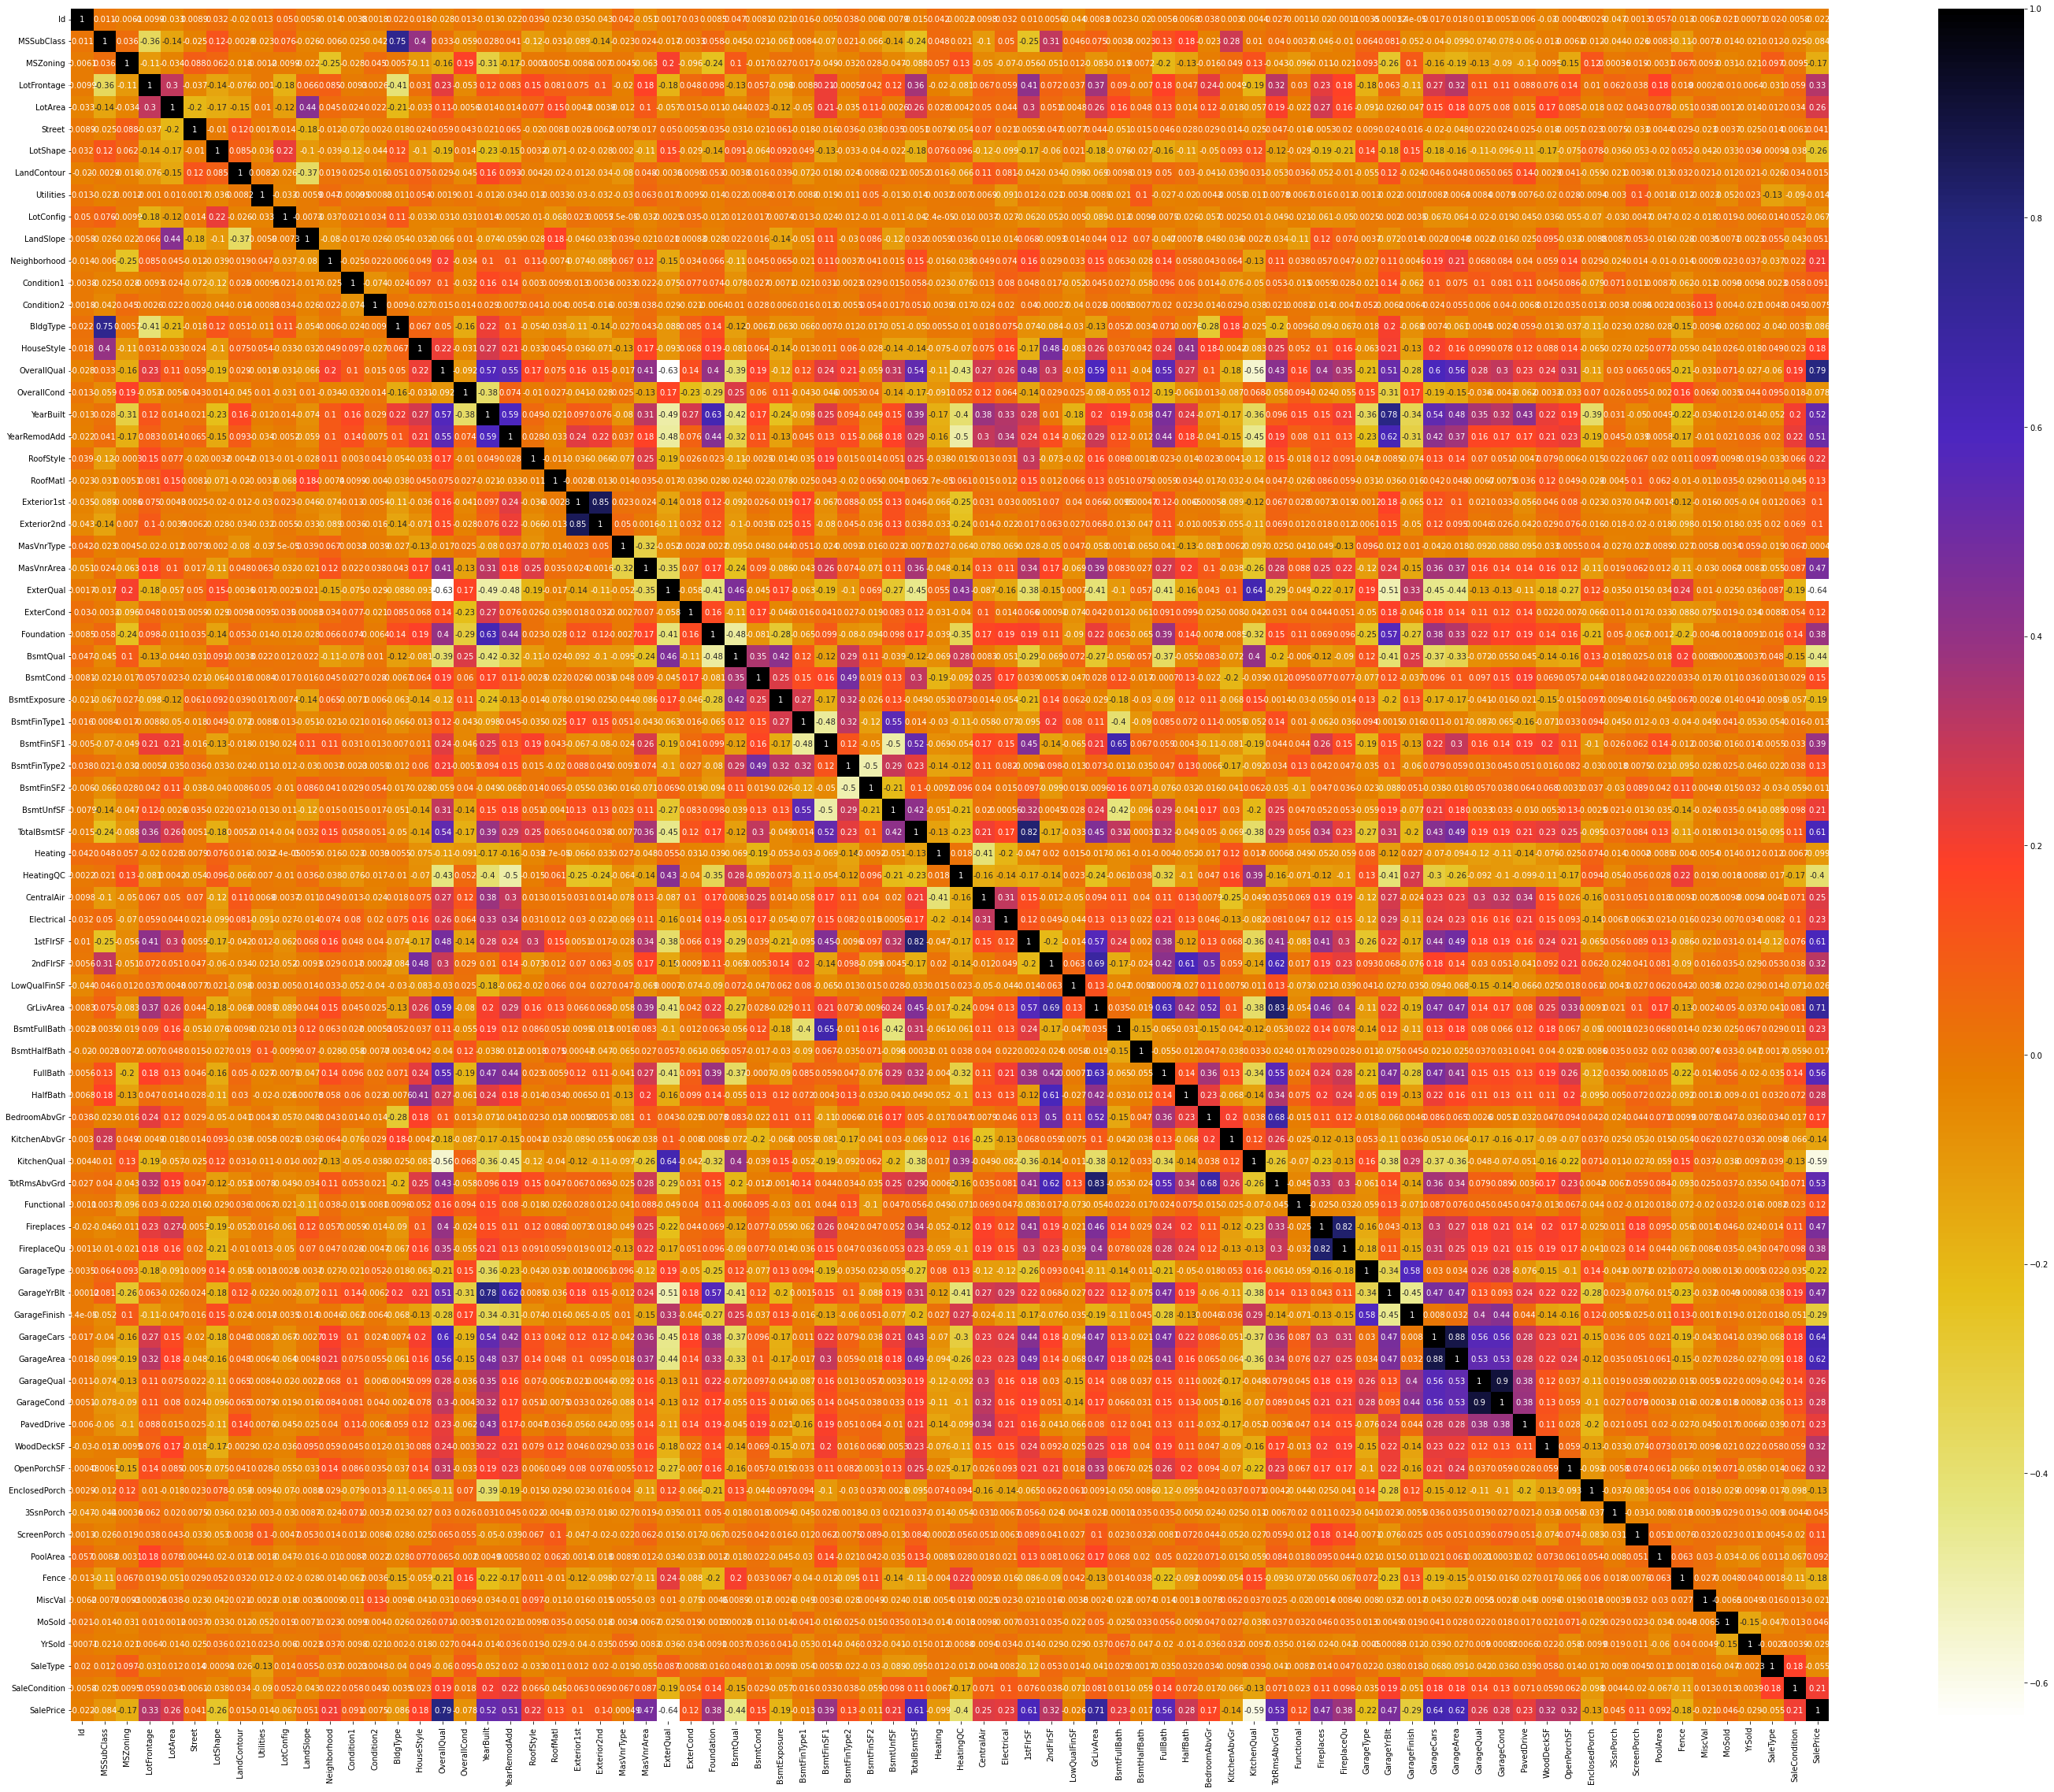

In [56]:
plt.figure(figsize=(50,40))
corr =train_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [57]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [60]:

corr_features = correlation(train_df, 0.85)
corr_features

{'Exterior2nd', 'GarageArea', 'GarageCond'}

> If we drop these columns r^2 of validation will drop so we wont drop cols

In [61]:
# Proceed for modelling

In [62]:
from sklearn.model_selection import train_test_split

X = train_df.drop("SalePrice", axis=1)

y = train_df["SalePrice"]

 # As we have  diff test set so we will split train and valid sets
    
X_train,X_val, y_train, y_val = train_test_split(X,y ,test_size=0.30, random_state= 0)

# Build model
>* ***Here we will try following models.***
>>* Lasso 
>>* Random forest
>>* XGboost


In [63]:
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from yellowbrick.regressor import residuals_plot

### Creating function for checking scores of diffrent models
>* I have 1460 rows so will use bellow fuction directly if we have dataset with more sample then this fuction will take lot of time so we would have gven only sample of dataset for testing models.

>* By param max sample we can set len of data for experiment purpose.

In [64]:
models_dict = {'Lasso':Lasso(),
               'Random forest': RandomForestRegressor(),
               'XGB': XGBRegressor()}

In [75]:
def model_scores(models, X_train, X_val, y_train, y_val):
    
    np.random.seed(0)
    
    model_score = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_score[name] = model.score(X_val, y_val )
    
    return model_score             

In [76]:
# check score of trained model
model_scores = model_scores(models_dict,X_train,X_val,y_train,y_val)
model_scores

{'Lasso': 0.6800351230448772,
 'Random forest': 0.8579082475709652,
 'XGB': 0.8594519493336967}

<AxesSubplot:>

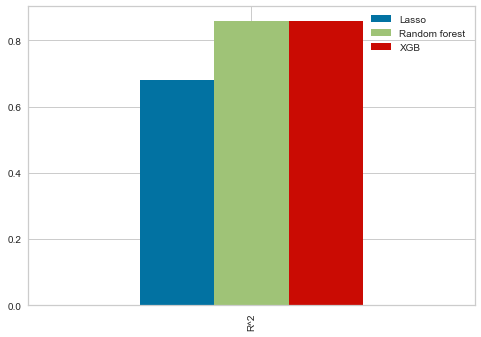

In [77]:
scores_df = pd.DataFrame(model_scores, index =["R^2"])
scores_df.plot.bar()

#### Building evaluation model we want root mean squared error but we  have mean squared error so we will create function which will return the RMSE

In [78]:
from sklearn.metrics import mean_squared_error,r2_score
def rmse(y_preds,y_val):
    return np.sqrt(mean_squared_error(y_preds,y_val))

def show_all_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    score={"training MSE":mean_squared_error(train_preds,y_train),
           "validation MSE":mean_squared_error(val_preds,y_val),
           "training RMSE":rmse(train_preds,y_train),
           "validation RMSE":rmse(val_preds,y_val),
            "training R^2":r2_score(train_preds,y_train),
           "validation R^2":r2_score(val_preds,y_val) }
    return score
    

### Now we will check scores of models for above metrics
#### Lasso

In [79]:
# for Lasso

lasso_model= Lasso()
lasso_model.fit(X_train,y_train)

# to check score we will call our fuction
show_all_scores(lasso_model)


{'training MSE': 697325826.2736568,
 'validation MSE': 2172238811.0571313,
 'training RMSE': 26406.92761897258,
 'validation RMSE': 46607.28281134968,
 'training R^2': 0.8709114025531477,
 'validation R^2': 0.6967342229957829}

### Random Forest

In [80]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
show_all_scores(random_model)


{'training MSE': 124515228.06787787,
 'validation MSE': 928207621.9361018,
 'training RMSE': 11158.639167384072,
 'validation RMSE': 30466.49999484847,
 'training R^2': 0.9769713144613493,
 'validation R^2': 0.8304012020220275}

### XGB

In [81]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train,y_train)
show_all_scores(XGB_model)

{'training MSE': 645587.8062175296,
 'validation MSE': 954179513.0175776,
 'training RMSE': 803.4847890393007,
 'validation RMSE': 30889.79626053849,
 'training R^2': 0.9998939892281745,
 'validation R^2': 0.8319470995117775}

# HyperParams Tunning

In [82]:
#  Tuining with following params for RANDOM forest:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
            }

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [84]:


rf_model=  RandomizedSearchCV(RandomForestRegressor(random_state=0),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=1)

rf_model.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=1)

In [85]:
rf_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 10}

In [86]:
show_all_scores(rf_model)

{'training MSE': 620379539.5477046,
 'validation MSE': 1206247794.6678088,
 'training RMSE': 24907.419367483748,
 'validation RMSE': 34731.07822495306,
 'training R^2': 0.852658506210991,
 'validation R^2': 0.722508858845446}

### xgbRegressor

In [87]:
xgb_grid = {'learning_rate': [0.01,0.05,0.5,0.03],
 'max_depth': [4,6,8,10],
 'gamma':[0,1,2]}

In [88]:
%%time
xgb_randomcv = RandomizedSearchCV(XGBRegressor(),
                              param_distributions=xgb_grid,
                              n_iter=20,
                              cv=5,
                              verbose=0)
xgb_randomcv.fit(X_train, y_train);

CPU times: total: 2min 27s
Wall time: 24.1 s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                         

In [89]:
xgb_randomcv.best_params_

{'max_depth': 8, 'learning_rate': 0.05, 'gamma': 2}

In [90]:
show_all_scores(xgb_randomcv)

{'training MSE': 27958499.78761998,
 'validation MSE': 1070860702.3583952,
 'training RMSE': 5287.579766549152,
 'validation RMSE': 32724.008042389843,
 'training R^2': 0.9951579801830767,
 'validation R^2': 0.7947230053198816}

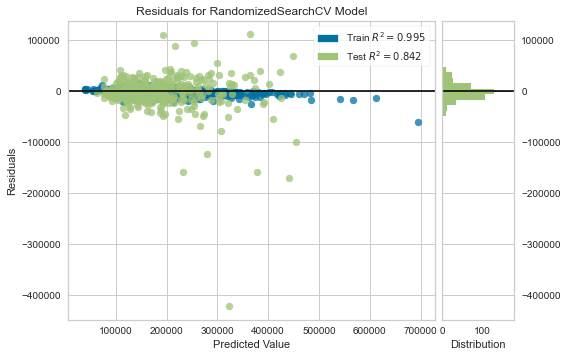

In [91]:
residuals_plot(xgb_randomcv,X_train, y_train, X_val, y_val);

### XGB has given best score will do Grid search on updated params_grid

In [92]:
xgb2_grid = {'learning_rate': [0.01,0.05,0.5,0.03],
 'max_depth': [5,6,7,10],
 'gamma':[0,1],
 'reg_lambda':[0,5,10]}

In [93]:
# here we are using subsample-0.9 and colsample_bytree-0.5 to overcome overfitting
# for each tree it will use random 90% of data and only 50% of columns and its speeds things up also

xgb_grid_model = GridSearchCV(XGBRegressor(subsample=0.9,colsample_bytree=0.5),
                        param_grid=xgb2_grid,
                       cv=4)

In [94]:
xgb_grid_model.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_c

In [95]:
xgb_grid_model.best_params_

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 0}

In [96]:
show_all_scores(xgb_grid_model)

{'training MSE': 82632564.13896878,
 'validation MSE': 909843944.3478369,
 'training RMSE': 9090.245548881987,
 'validation RMSE': 30163.619549845753,
 'training R^2': 0.9854576668930497,
 'validation R^2': 0.8369085255787915}

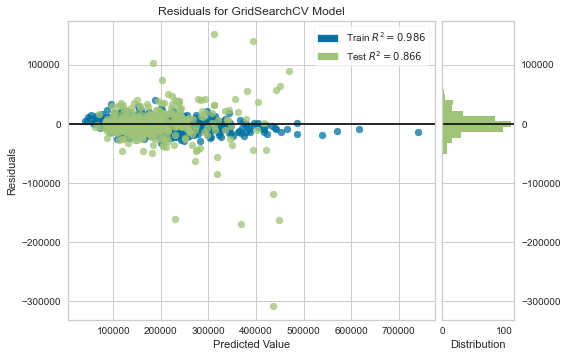

In [97]:
residuals_plot(xgb_grid_model,X_train, y_train, X_val, y_val);

## Best model

In [98]:
best_model = XGBRegressor(gamma= 0,
                          learning_rate= 0.05,
                          max_depth =6,
                          reg_lambda= 0,
                          subsample=0.9,colsample_bytree=0.5)
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [99]:
show_all_scores(best_model)

{'training MSE': 39337550.52410714,
 'validation MSE': 900697505.467942,
 'training RMSE': 6271.965443472018,
 'validation RMSE': 30011.622839625685,
 'training R^2': 0.9932348734699094,
 'validation R^2': 0.8408371898048207}

### Saved Model

In [102]:
import pickle
pickle.dump(best_model, open(r'C:\Users\SAGAR KESHAVE\Git_ML_Proj\Machine Learning Projects\Regression\House_price_prediction\Saved Model\best_xgb.sva',
                             'wb'))

In [103]:
df_test = pd.read_csv(r"C:\Users\SAGAR KESHAVE\Git_ML_Proj\Machine Learning Projects\Regression\House_price_prediction\Data\test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [104]:
# Same processing as trained dataset 

In [105]:
df_test.drop(['PoolQC','MiscFeature','Alley'],
             axis=1, inplace=True)

In [106]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]= content.astype("category")

In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   LotShape       1459 non-null   category
 7   LandContour    1459 non-null   category
 8   Utilities      1457 non-null   category
 9   LotConfig      1459 non-null   category
 10  LandSlope      1459 non-null   category
 11  Neighborhood   1459 non-null   category
 12  Condition1     1459 non-null   category
 13  Condition2     1459 non-null   category
 14  BldgType       1459 non-null   category
 15  HouseStyle     1459 non-null   category
 16  OverallQual    1459 non-null   int64   
 17  OverallCond    1459 non-null   in

In [108]:
for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label]=content.fillna(content.median())
                
for label, content in df_test.items():         
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label]= pd.Categorical(content).codes+1
            
        

In [109]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,3,0.0,4,5,2,4,4,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,3,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,4,5,2,4,4,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,0,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,3,0.0,4,5,3,3,4,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,3,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,4,5,3,4,4,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,1,2,1,5,1,23,3,3,5,3,8,5,1992,1992,2,1,7,7,3,0.0,3,5,3,3,4,4,1,263.0,6,0.0,1017.0,1280.0,1,1,2,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,0,2,1992.0,2,2.0,506.0,4,5,3,0,82,0,0,144,0,0,0,1,2010,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,21.0,1936,2,4,4,1,5,1,11,3,3,4,5,4,7,1970,1970,2,1,6,6,3,0.0,4,5,2,4,4,4,6,0.0,6,0.0,546.0,546.0,1,3,2,4,546,546,0,1092,0.0,0.0,1,1,3,1,4,5,7,0,0,0,1979.0,0,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,6,2006,9,5
1455,2916,160,5,21.0,1894,2,4,4,1,5,1,11,3,3,5,5,4,5,1970,1970,2,1,6,6,3,0.0,4,5,2,4,4,4,5,252.0,6,0.0,294.0,546.0,1,5,2,4,546,546,0,1092,0.0,0.0,1,1,3,1,4,6,7,0,0,5,1970.0,3,1.0,286.0,4,5,3,0,24,0,0,0,0,0,0,4,2006,9,1
1456,2917,20,4,160.0,20000,2,4,4,1,5,1,12,3,3,1,3,5,7,1960,1996,2,1,11,13,3,0.0,4,5,2,4,4,4,1,1224.0,6,0.0,0.0,1224.0,1,1,2,4,1224,0,0,1224,1.0,0.0,1,0,4,1,4,7,7,1,5,6,1960.0,3,2.0,576.0,4,5,3,474,0,0,0,0,0,0,0,9,2006,9,1
1457,2918,85,4,62.0,10441,2,4,4,1,5,1,12,3,3,1,6,5,5,1992,1992,2,1,7,15,3,0.0,4,5,3,3,4,1,3,337.0,6,0.0,575.0,912.0,1,5,2,4,970,0,0,970,0.0,1.0,1,0,3,1,4,6,7,0,0,0,1979.0,0,0.0,0.0,0,0,3,80,32,0,0,0,0,3,700,7,2006,9,5


In [110]:
test_preds = best_model.predict(df_test)
test_preds

array([122281.234, 158312.12 , 183356.31 , ..., 161735.28 , 111347.805,
       216074.44 ], dtype=float32)

In [111]:
Test_Prediction = pd.DataFrame()
Test_Prediction["ID"] = df_test["Id"]
Test_Prediction["SALE_PRICE"] = test_preds

In [112]:
Test_Prediction

,ID,SALE_PRICE
0,1461,122281.234375
1,1462,158312.125000
2,1463,183356.312500
3,1464,185160.187500
4,1465,175520.468750
...,...,...
1454,2915,78371.062500
1455,2916,83370.046875
1456,2917,161735.281250
1457,2918,111347.804688


Text(0.5, 1.0, 'Test Predictions')

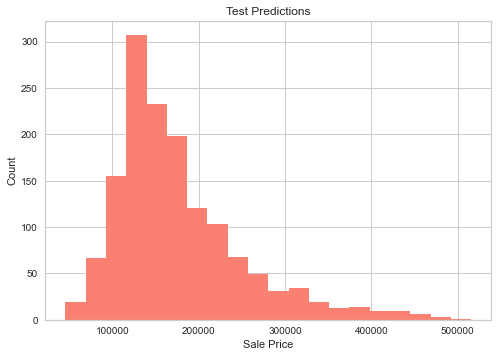

In [117]:
plt.hist(Test_Prediction.SALE_PRICE, bins=20, color="salmon")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Test Predictions")

In [118]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

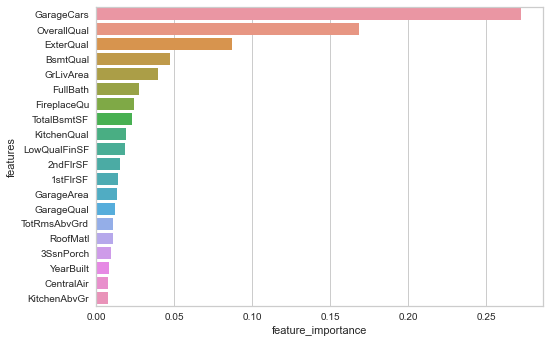

In [119]:
plot_features(X_train.columns, best_model.feature_importances_)